# 01 – Data Preprocessing
### Student Depression Prediction: Preparing Data for XGBoost Model
---

## 📌 Objective
Prepare and clean the student depression dataset for machine learning analysis using XGBoost classification.

**Key Tasks:**
- Load and explore raw data
- Handle missing values and duplicates
- Encode categorical variables
- Feature engineering
- Exploratory data analysis
- Export clean dataset for modeling


---

### 📂 Input  
 - `student_depression_dataset.csv` saved in `Data/raw/`  


### 📦 Output  
- `clean_data.csv` saved in `Data/processed/FC110552_mithula-cbw/`

---

### 📊 Dataset Overview

| **Attribute** | **Details** |
|---------------|-------------|
| **Dataset Size** | 27,901 records × 18 features |
| **Data Type** | Structured tabular data (CSV format) |
| **Target Variable** | `Depression_Status` (Binary: 0/1 or Yes/No) |
| **Problem Type** | Binary Classification |
| **Data Source** | [Student Depression Dataset](www.kaggle.com/datasets/adilshamim8/student-depression-dataset) |

### 📈 Expected Outcomes
- Clean, processed dataset ready for machine learning

## Step 1: Data Loading & Exploration

In [240]:
# =====================================
# STEP 1: DATA LOADING & EXPLORATION
# =====================================


# Load libraries and suppress warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from prettytable import PrettyTable
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [241]:

# Load the dataset
raw_df = pd.read_csv("./Data/raw/student_depression_dataset.csv")

In [242]:
# Reusable function definitions

# Function to Print Shape of DataFrame
def get_data_shape(data: pd.DataFrame) -> None:
    if data.empty:
        print("DataFrame is empty.")
    else:
        # Print the shape of the DataFrame
        print("DataFrame Dimensions")
        print("------------------------")
        print(f"Rows   : {data.shape[0]}")
        print(f"Columns: {data.shape[1]}\n")

# Function to prints the first `n` rows of the given DataFrame.
def print_head(data: pd.DataFrame, n: int = 5) -> None:
    print(f"\nFirst {n} rows:")
    display(data.head(n))

# A function to format value counts into a table. For more elegant and readable notebook.
def value_counts_pretty(series, column_name="Value", n=None, head=True):
    value_counts = series.value_counts(dropna=False)
    percentages = series.value_counts(dropna=False, normalize=True) * 100
    
    # Apply head/tail filtering if n is specified
    if n is not None:
        if head:
            value_counts = value_counts.head(n)
            percentages = percentages.head(n)
        else:
            value_counts = value_counts.tail(n)
            percentages = percentages.tail(n)
    
    table = PrettyTable()        
    table.field_names = [column_name, "Count", "Percentage"]
    
    # Set alignment
    table.align[column_name] = "c"
    table.align["Count"] = "r"
    table.align["Percentage"] = "r"
    
    # Add rows
    for rank, (value, count) in enumerate(value_counts.items(), 1):
        display_value = "NaN/Missing" if pd.isna(value) else str(value)
        pct = percentages[value]
        
        table.add_row([display_value, count, f"{pct:.2f}%"])
    
    return table

In [243]:
# Find the dimensions of the dataset
get_data_shape(raw_df)

DataFrame Dimensions
------------------------
Rows   : 27901
Columns: 18



In [244]:
# Check data structure and datatypes of each column
table = PrettyTable()
table.field_names = ["Column", "Non-Null Count", "Dtype"]

for col in raw_df.columns:
    non_null_count = raw_df[col].count()
    dtype = raw_df[col].dtype
    table.add_row([col, non_null_count, dtype])

print("\n🔹 Dataset Summary:")
print(table)


🔹 Dataset Summary:
+---------------------------------------+----------------+---------+
|                 Column                | Non-Null Count |  Dtype  |
+---------------------------------------+----------------+---------+
|                   id                  |     27901      |  int64  |
|                 Gender                |     27901      |  object |
|                  Age                  |     27901      | float64 |
|                  City                 |     27901      |  object |
|               Profession              |     27901      |  object |
|           Academic Pressure           |     27901      | float64 |
|             Work Pressure             |     27901      | float64 |
|                  CGPA                 |     27901      | float64 |
|           Study Satisfaction          |     27901      | float64 |
|            Job Satisfaction           |     27901      | float64 |
|             Sleep Duration            |     27901      |  object |
|             

In [245]:
# Display first few rows (Provides a quick look at the dataset's content).
print_head(raw_df)


First 5 rows:


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


💡 **Observations:**  
- All columns seems to be having `27901` Non-Null counts suggesting no missing values.
- All column names are readable and appear to be semantically meaningful.
- The `id` column does not increment sequentially
- `Work Pressure` and `Job Satisfaction` have only 0.0 values in the initial rows.
- The `Profession` column appears to contain only "Student" values so far.

> *🧠 Some column names contain spaces, which can cause issues in processing, let's fix them up.*

In [246]:
# Clean column names
# Remove leading/trailing spaces, convert to lowercase, replace spaces and question marks
# 🍀 Return a new dataframe
df = raw_df.copy()      
df.columns = [col.strip().lower().replace(" ", "_").replace("/", "_").replace("?", "").rstrip("_") for col in raw_df.columns]
print("\nColumn names:")
print(df.columns.tolist())


Column names:
['id', 'gender', 'age', 'city', 'profession', 'academic_pressure', 'work_pressure', 'cgpa', 'study_satisfaction', 'job_satisfaction', 'sleep_duration', 'dietary_habits', 'degree', 'have_you_ever_had_suicidal_thoughts', 'work_study_hours', 'financial_stress', 'family_history_of_mental_illness', 'depression']


In [247]:
# Prints basic statistics (mean, standard deviation, min, max, etc.)
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('id', errors='ignore')  # For  numeric data types
display(df[numeric_cols].describe())   

,age,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,work_study_hours,depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


💡 **Observations:**  
- `Age` mostly ranges between 21 to 30, aligning with student demographics ,though the max age is 59, which may be an outlier or non-student entry.
- `Work Pressure` and `Job Satisfaction` values appear to be very close to 0, suggesting missing data, poor scaling, or inactive features. 

> *🧠 First, let's examine the behavior of `Work Pressure` and `Job Satisfaction` to understand their distribution better*


In [248]:
# Analyze Selected Columns: `Work Pressure` and `Job Satisfaction`
colsJob = ['work_pressure', 'job_satisfaction']
for col in colsJob:
    print(f"\n🔍 Value counts for '{col}':")
    print(value_counts_pretty(df[col], col , n=3))


🔍 Value counts for 'work_pressure':
+---------------+-------+------------+
| work_pressure | Count | Percentage |
+---------------+-------+------------+
|      0.0      | 27898 |     99.99% |
|      5.0      |     2 |      0.01% |
|      2.0      |     1 |      0.00% |
+---------------+-------+------------+

🔍 Value counts for 'job_satisfaction':
+------------------+-------+------------+
| job_satisfaction | Count | Percentage |
+------------------+-------+------------+
|       0.0        | 27893 |     99.97% |
|       2.0        |     3 |      0.01% |
|       4.0        |     2 |      0.01% |
+------------------+-------+------------+


💡 **Observations:**  
- Work Pressure: 99.99% of the values are 0.0
- Job Satisfaction: Also dominated by 0.0 values 99.97%.

> *🧠 Work Pressure and Job Satisfaction show extreme class imbalance (>99% zero). These features likely carry no predictive value and may be excluded from training.*



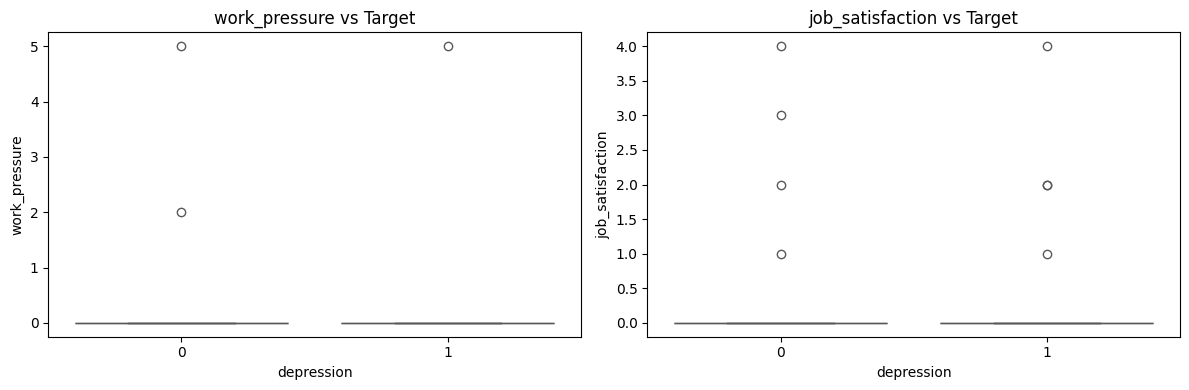

In [249]:
# Visualize distributions of selected job-related columns
plt.figure(figsize=(12, 4))

for i, col in enumerate(colsJob, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(data=df, x='depression', y=col, palette='Set2')
    plt.title(f'{col} vs Target')
    plt.xlabel('depression')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


💡 **Observations:**  
- The few non-zero values are rare outliers, and they're randomly scattered, not concentrated in any one class.

> *🧠 This pattern strongly suggests these features offer no meaningful separation between the target classes.*


> 🔻 So we drop `Work Pressure` and `Job Satisfaction` : highly skewed, not predictive.

In [250]:
# 📌 Drop the columns in place
df.drop(['work_pressure', 'job_satisfaction'], axis=1, inplace=True)

> *🧠 Next we can focus on the `Profession` column.*

In [251]:
# Analyze Profession value counts.
print(f"\n# Value counts for 'Profession':")
print(df['profession'].value_counts(dropna=False))


# Value counts for 'Profession':
profession
Student                     27870
Architect                       8
Teacher                         6
'Digital Marketer'              3
Chef                            2
'Content Writer'                2
Pharmacist                      2
Doctor                          2
'UX/UI Designer'                1
'Civil Engineer'                1
Manager                         1
'Educational Consultant'        1
Lawyer                          1
Entrepreneur                    1
Name: count, dtype: int64


In [252]:
# Summary of value counts for better readability
print(f"\n# Summery of value counts 'Profession':")

student_count = df[df['profession'] == 'Student'].shape[0]
print(f"Student count: {student_count}")

non_student_count = df.shape[0] - student_count
print(f"Other count: {non_student_count} ({(non_student_count/df.shape[0])*100:.2f}%)")


# Summery of value counts 'Profession':
Student count: 27870
Other count: 31 (0.11%)


💡 **Observations:**  
- The column `Profession` is heavily imbalanced, with "Student" making up 99.89% of the data.
- The remaining values represent non-student professions and occur in very small numbers. 

> *🧠 Since our project focuses on students, and the presence of other professions is minimal and irrelevant, these entries can be safely excluded.*

> 🔻 So we drop `Profession` : not needed after filtering to only student data.

In [253]:
# 📌 Drop the column in place
df.drop(['profession'], axis=1, inplace=True)

In [254]:
# A quick look at the data frame after the changes
print_head(df)


First 5 rows:


,id,gender,age,city,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts,work_study_hours,financial_stress,family_history_of_mental_illness,depression
0,2,Male,33.0,Visakhapatnam,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [255]:
# new dimensions of the dataset
get_data_shape(df)

DataFrame Dimensions
------------------------
Rows   : 27901
Columns: 15



> *🧠 Next we can focus on the `City` column.*
- Since our project focuses on **student depression**, and the dataset is sourced from **India**, we need to evaluate whether `City` contributes meaningful information or if it introduces noise due to geographic mismatch or imbalance.

In [256]:
# Check Basic Distribution of 'City' Column

# Count of unique cities
print(f"Unique cities: {df['city'].nunique()}")

# Top 5 most frequent cities
print("\n🔍Top 5 Most Frequent Cities:")
print(value_counts_pretty(df['city'], "City", n=5))

# Top 5 least frequent cities
print("\n🔍Top 5 Least Frequent Cities:")
print(value_counts_pretty(df['city'], "City", n=5, head=False))


Unique cities: 52

🔍Top 5 Most Frequent Cities:
+-------------+-------+------------+
|     City    | Count | Percentage |
+-------------+-------+------------+
|    Kalyan   |  1570 |      5.63% |
|   Srinagar  |  1372 |      4.92% |
|  Hyderabad  |  1340 |      4.80% |
| Vasai-Virar |  1290 |      4.62% |
|   Lucknow   |  1155 |      4.14% |
+-------------+-------+------------+

🔍Top 5 Least Frequent Cities:
+-----------+-------+------------+
|    City   | Count | Percentage |
+-----------+-------+------------+
|   Nalyan  |     1 |      0.00% |
|   Mihir   |     1 |      0.00% |
|   Nalini  |     1 |      0.00% |
|  Nandini  |     1 |      0.00% |
| Khaziabad |     1 |      0.00% |
+-----------+-------+------------+


💡 **Observations:**  
- The top 5 cities each have ~1000 or more entries.
- The bottom 5 cities have only 1 record each, suggesting they're rare or outliers.

> *🧠 Let's visualize the city distribution for a clearer understanding of its skewness.*

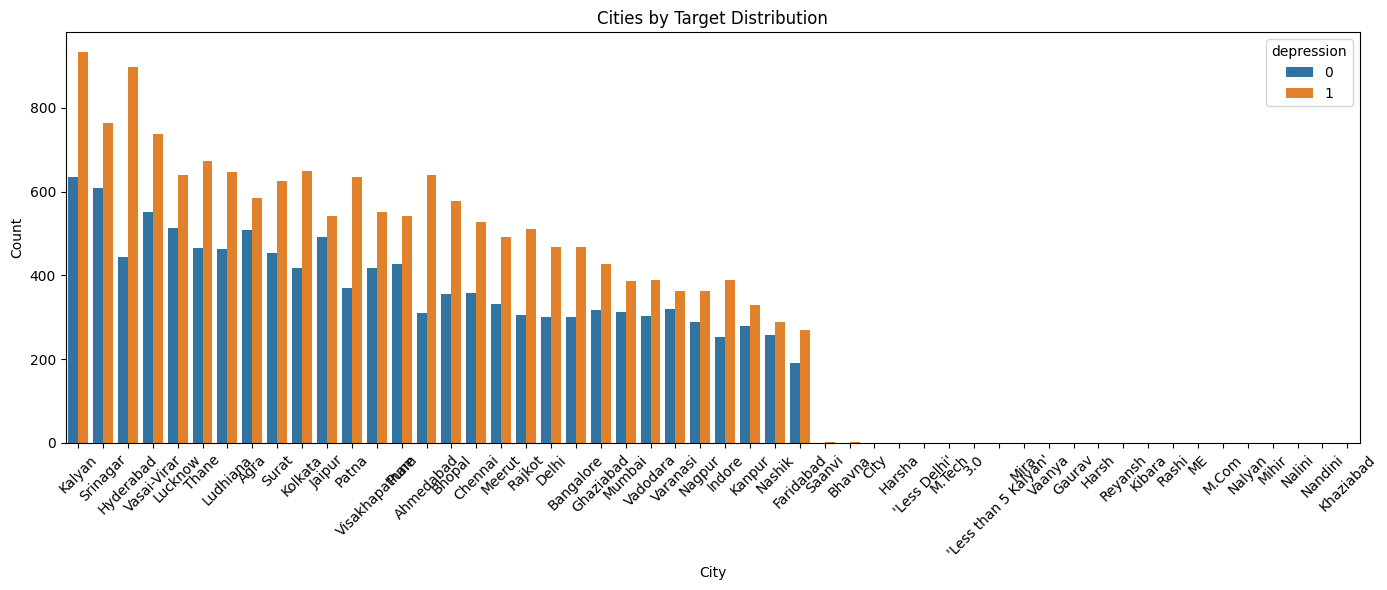

In [257]:
# Data visualization for `City` column

plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='city', hue='depression', order=df['city'].value_counts().index[:])
plt.title("Cities by Target Distribution")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

💡 **Observations:**  
- `City` column shows a long-tail distribution with top cities highly represented
- There are clear data quality issues, as some entries in the City column are invalid or noisy, `e.g., 'Less than 5', 'M.Tech', 'M.Com', Nayra, Mini, etc.`  

.
> *🔻 City column will be dropped because:*
- The dataset contains Indian cities, not relevant and may introduce regional bias.
- The column has significant skewness, with a few cities dominating the data
- There are clear data quality issues.

In [258]:
# 📌 Drop the column in place
df.drop(['city'], axis=1, inplace=True)

In [259]:
# Overview of the dataset after column drops
# new dimensions of the dataset
get_data_shape(df)
# Let's take a look at remaining columns

print("\nColumn names:")
print(df.columns.tolist())

# Print first five rows 
print(f"\nFirst five rows of edited dataset:")
df.head()

DataFrame Dimensions
------------------------
Rows   : 27901
Columns: 14


Column names:
['id', 'gender', 'age', 'academic_pressure', 'cgpa', 'study_satisfaction', 'sleep_duration', 'dietary_habits', 'degree', 'have_you_ever_had_suicidal_thoughts', 'work_study_hours', 'financial_stress', 'family_history_of_mental_illness', 'depression']

First five rows of edited dataset:


,id,gender,age,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts,work_study_hours,financial_stress,family_history_of_mental_illness,depression
0,2,Male,33.0,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [260]:
# Statistical Summary of the dataset after column drops
# Statistical Summary for Numerical Columns (excluding 'id' if needed)
print("Statistical Summary for Numerical Columns:")
print(df.describe())

# Statistical Summary for Categorical Column
print("\nStatistical Summary for Categorical Columns:")
cat_describe = df.describe(include=['object']).transpose()

table = PrettyTable()
table.field_names = ['Column', 'Count', 'Unique', 'Top', 'Freq']

for col_name, row in cat_describe.iterrows():
    table.add_row([
        col_name,
        row['count'],
        row['unique'],
        row['top'],
        row['freq']
    ])

print(table)

Statistical Summary for Numerical Columns:
                  id           age  academic_pressure          cgpa  study_satisfaction  work_study_hours    depression
count   27901.000000  27901.000000       27901.000000  27901.000000        27901.000000      27901.000000  27901.000000
mean    70442.149421     25.822300           3.141214      7.656104            2.943837          7.156984      0.585499
std     40641.175216      4.905687           1.381465      1.470707            1.361148          3.707642      0.492645
min         2.000000     18.000000           0.000000      0.000000            0.000000          0.000000      0.000000
25%     35039.000000     21.000000           2.000000      6.290000            2.000000          4.000000      0.000000
50%     70684.000000     25.000000           3.000000      7.770000            3.000000          8.000000      1.000000
75%    105818.000000     30.000000           4.000000      8.920000            4.000000         10.000000      1.0000

💡 **Observations:**  
- All the remaining columns appear to be relevant to the analysis.
- Most categorical features seem to be already encoded as numerical ranges.

> *🧠 Some categorical columns (e.g., sleep time) may require custom handling*

## Step 2: Data Type Casting

In [261]:
# Check new data structure and datatypes of each column
table = PrettyTable()
table.field_names = ["Column", "Non-Null Count", "Dtype"]

for col in df.columns:
    non_null_count = df[col].count()
    dtype = df[col].dtype
    table.add_row([col, non_null_count, dtype])

print("\n🔹 New Dataset Summary:")
print(table)


🔹 New Dataset Summary:
+-------------------------------------+----------------+---------+
|                Column               | Non-Null Count |  Dtype  |
+-------------------------------------+----------------+---------+
|                  id                 |     27901      |  int64  |
|                gender               |     27901      |  object |
|                 age                 |     27901      | float64 |
|          academic_pressure          |     27901      | float64 |
|                 cgpa                |     27901      | float64 |
|          study_satisfaction         |     27901      | float64 |
|            sleep_duration           |     27901      |  object |
|            dietary_habits           |     27901      |  object |
|                degree               |     27901      |  object |
| have_you_ever_had_suicidal_thoughts |     27901      |  object |
|           work_study_hours          |     27901      | float64 |
|           financial_stress          

### Column Type Categorization

- **Numerical Columns:** Continuous or discrete numeric variables, including already ordinal numeric features.
  - `age`, `academic_pressure`, `cgpa`, `study_satisfaction`, `work_study_hours`, `financial_stress`

- **Ordinal Categorical Columns:** Categorical variables with meaningful order, to be mapped to ordered integers.
  - `degree`, `sleep_duration`

- **Nominal Categorical Columns:** Categorical variables without inherent order.
  - `gender`, `dietary_habits`, `have_you_ever_had_suicidal_thoughts`, `family_history_of_mental_illness`


In [262]:
# Numerical columns
num_cols = ['age', 'academic_pressure', 'cgpa', 'financial_stress',
            'study_satisfaction', 'work_study_hours']

# List of nominal categorical columns
nominal_cat_cols = ['gender', 'dietary_habits',
                    'have_you_ever_had_suicidal_thoughts',
                    'family_history_of_mental_illness']

# List of ordinal categorical columns
ordinal_cols = ['degree', 'sleep_duration'] 


# Converts the nominal categorical columns defined above to 'category' data type.
for col in nominal_cat_cols:
    df[col] = df[col].astype('category')

> *🧠 Let's understand the content of the following columns to determining cleaning strategies.*

In [263]:
# Prints the unique values in the categorical columns.
print(f"\n🔍 Count of values in 'sleep_duration':", df['sleep_duration'].dtype)
print(value_counts_pretty(df['sleep_duration']))
print(f"\n🔍 Count of values in 'financial_stress':", df['financial_stress'].dtype)
print(value_counts_pretty(df['financial_stress']))


🔍 Count of values in 'sleep_duration': object
+---------------------+-------+------------+
|        Value        | Count | Percentage |
+---------------------+-------+------------+
| 'Less than 5 hours' |  8310 |     29.78% |
|     '7-8 hours'     |  7346 |     26.33% |
|     '5-6 hours'     |  6183 |     22.16% |
| 'More than 8 hours' |  6044 |     21.66% |
|        Others       |    18 |      0.06% |
+---------------------+-------+------------+

🔍 Count of values in 'financial_stress': object
+-------+-------+------------+
| Value | Count | Percentage |
+-------+-------+------------+
|  5.0  |  6715 |     24.07% |
|  4.0  |  5775 |     20.70% |
|  3.0  |  5226 |     18.73% |
|  1.0  |  5121 |     18.35% |
|  2.0  |  5061 |     18.14% |
|   ?   |     3 |      0.01% |
+-------+-------+------------+


In [264]:
print(f"\n🔍 Count of values in 'dietary_habits':", df['dietary_habits'].dtype)
print(value_counts_pretty(df['dietary_habits']))


🔍 Count of values in 'dietary_habits': category
+-----------+-------+------------+
|   Value   | Count | Percentage |
+-----------+-------+------------+
| Unhealthy | 10317 |     36.98% |
|  Moderate |  9921 |     35.56% |
|  Healthy  |  7651 |     27.42% |
|   Others  |    12 |      0.04% |
+-----------+-------+------------+


### 💡 Observations

- Sleep Duration:
  Contains values that have surrounding single quotes (e.g., `'5-6 hours'`).
  The `'Others'` category can be missing data and may require removal.

- Financial Stress:
  Mostly ordinal ordinal numeric values (1.0 to 5.0).  
  Contains a few invalid entries (`'?'`) that should be treated as missing data and handled accordingly.

- Dietary Habits:
  Here too the `'Others'` category can be missing data and may require removal.


In [265]:
# Replace 'Others' with NaN
df['sleep_duration'] = df['sleep_duration'].replace('Others', np.nan)
df['dietary_habits'] = df['dietary_habits'].replace('Others', np.nan)

# Replace '?' with NaN in Financial Stress
df['financial_stress'] = df['financial_stress'].replace('?', np.nan)
# Convert Financial Stress to numeric
df['financial_stress'] = pd.to_numeric(df['financial_stress'], errors='coerce')
print(f"Financial Stress datatype: ", df['financial_stress'].dtype)

Financial Stress datatype:  float64


## Step 3: Data Cleaning

In [266]:
# ============================
# STEP 3: DATA CLEANING 
# ============================

# Duplicates analysis
print(f"\nDuplicate rows: {df.duplicated().sum()}")


Duplicate rows: 0


💡 **Observations:**  
- No duplicates found at first glance.

> *🧠 Let’s remove the unique id and check again*  
> *🔻 `id` column will be dropped because:*
> - The `id` column has no predictive value.  
> - Hidden duplicates might exist except for the unique `id`.

In [267]:
# 📌 Drop the `id` column in place
df.drop(['id'], axis=1, inplace=True)

# Check for duplicates again after dropped `id`
print(f"\nDuplicate rows: {df.duplicated().sum()}")



Duplicate rows: 0


💡 **Observations:**  
- No duplicates found.

In [268]:
# Missing values analysis
df.isnull().sum()


gender                                  0
age                                     0
academic_pressure                       0
cgpa                                    0
study_satisfaction                      0
sleep_duration                         18
dietary_habits                         12
degree                                  0
have_you_ever_had_suicidal_thoughts     0
work_study_hours                        0
financial_stress                        3
family_history_of_mental_illness        0
depression                              0
dtype: int64

### 💡 Observations

- The dataset contains missing values in two columns: `sleep_duration` and `financial_stress`.  
> 🧠 Since the number of missing entries is very small, it's reasonable to drop those rows.


In [269]:
# 🍀 Drop rows with any missing values and create a new DataFrame
df_cleaned = df.dropna()

# Optional: Check shape to confirm rows were removed
print("Original shape:", df.shape)
print("Cleaned shape :", df_cleaned.shape)
print(f"🗑️ Rows deleted: {(df.shape[0] - df_cleaned.shape[0])}")

Original shape: (27901, 13)
Cleaned shape : (27868, 13)
🗑️ Rows deleted: 33


## Step 4: Ordinal Categorical Encoding

In this section, we will encode the ordinal categorical variables that are not yet encoded.

- **Ordinal Categorical Columns:**  
-  `degree`
- `sleep_duration`

### Encode `degree`

In [270]:
# Print number of unique categories
num_unique = df_cleaned['degree'].nunique(dropna=True)
print(f"\n🔹 Number of unique categories: {num_unique}")

# Print value counts for 'degree'
print("\n🔹 Degree value counts:")
print(value_counts_pretty(df_cleaned['degree']))


🔹 Number of unique categories: 28

🔹 Degree value counts:
+------------+-------+------------+
|   Value    | Count | Percentage |
+------------+-------+------------+
| 'Class 12' |  6079 |     21.81% |
|    B.Ed    |  1864 |      6.69% |
|   B.Com    |  1504 |      5.40% |
|   B.Arch   |  1476 |      5.30% |
|    BCA     |  1431 |      5.13% |
|    MSc     |  1189 |      4.27% |
|   B.Tech   |  1151 |      4.13% |
|    MCA     |  1041 |      3.74% |
|   M.Tech   |  1020 |      3.66% |
|    BHM     |   925 |      3.32% |
|    BSc     |   886 |      3.18% |
|    M.Ed    |   819 |      2.94% |
|  B.Pharm   |   809 |      2.90% |
|   M.Com    |   734 |      2.63% |
|    BBA     |   696 |      2.50% |
|    MBBS    |   695 |      2.49% |
|    LLB     |   670 |      2.40% |
|     BE     |   611 |      2.19% |
|     BA     |   597 |      2.14% |
|  M.Pharm   |   581 |      2.08% |
|     MD     |   572 |      2.05% |
|    MBA     |   561 |      2.01% |
|     MA     |   544 |      1.95% |
|    

💡 **Observations:**  
- There are **28 unique categories** in the `degree` column.  
- The entry `'Class 12'` includes unwanted quotation marks, which need to be cleaned.

> *🧠  Let's map each degree to an integer based on its academic level*  

> Encoding Plan:
>- **0** – Others (non-standard or unknown)
>- **1** – High school (Class 12)
>- **2** – Undergraduate degrees (e.g., BSc, B.Com, B.Tech, MBBS)
>- **3** – Postgraduate degrees (e.g., MSc, MBA, MD, M.Tech, LLM)
>- **4** – Doctorate (PhD)

In [271]:
# Remove surrounding quotes and whitespace
df_cleaned['degree'] = df_cleaned['degree'].str.strip().str.strip("'\"")

# Define the ordinal mapping
degree_encoding = {
    'Others': 0,
    'Class 12': 1,
    'B.Com': 2, 'BBA': 2, 'BA': 2, 'BSc': 2, 'BCA': 2, 'B.Pharm': 2,
    'BE': 2, 'B.Tech': 2, 'B.Arch': 2, 'BHM': 2, 'LLB': 2, 'MBBS': 2, 'B.Ed': 2,
    'MHM': 3, 'MSc': 3, 'MA': 3, 'M.Ed': 3, 'M.Com': 3, 'MCA': 3,
    'M.Tech': 3, 'M.Pharm': 3, 'ME': 3, 'MD': 3, 'MBA': 3, 'LLM': 3,
    'PhD': 4
}

# Apply the mapping to the dataframe
df_cleaned['degree_encoded'] = df_cleaned['degree'].map(degree_encoding)

### Encode `sleep_duration`

In [272]:
# Print number of unique categories
num_unique = df_cleaned['sleep_duration'].nunique(dropna=True)
print(f"\n🔹 Number of unique categories: {num_unique}")

# Print value counts for `sleep_duration`
print("\n🔹 Sleep Duration value counts:")
print(value_counts_pretty(df_cleaned['sleep_duration']))


🔹 Number of unique categories: 4

🔹 Sleep Duration value counts:
+---------------------+-------+------------+
|        Value        | Count | Percentage |
+---------------------+-------+------------+
| 'Less than 5 hours' |  8304 |     29.80% |
|     '7-8 hours'     |  7343 |     26.35% |
|     '5-6 hours'     |  6178 |     22.17% |
| 'More than 8 hours' |  6043 |     21.68% |
+---------------------+-------+------------+


💡 **Observations:**  
- Sleep duration categories are ordinal in nature, ranging from very short to longer sleep durations.
- Quotation marks around values need to be cleaned.

> *🧠 Encoding can be done with the following plan 

>Encoding Plan:
>- **0** – Less than 5 hours  
>- **1** – 5-6 hours  
>- **2** – 7-8 hours  
>- **3** – More than 8 hours



In [273]:
# Remove surrounding quotes and whitespace
df_cleaned['sleep_duration'] = df_cleaned['sleep_duration'].str.strip().str.strip("'\"")

# Define the ordinal mapping
sleep_duration_encoding = {
    'Less than 5 hours': 0,
    '5-6 hours': 1,
    '7-8 hours': 2,
    'More than 8 hours': 3
}

# Apply the mapping to the dataframe
df_cleaned['sleep_duration_encoded'] = df_cleaned['sleep_duration'].map(sleep_duration_encoding)

### Create a new dataframe after encoding

In [274]:
# 🍀 Create a new dataframe with encoded columns added and originals dropped
df_encoded = df_cleaned.drop(['degree', 'sleep_duration'], axis=1).copy()

# Add the newly created ordinal encoded columns to the list of numerical features
num_cols.extend(['degree_encoded', 'sleep_duration_encoded'])

print("After Ordinal Categorical Encoding,")
get_data_shape(df_encoded)

After Ordinal Categorical Encoding,
DataFrame Dimensions
------------------------
Rows   : 27868
Columns: 13



## Step 5: Exploratory Data Analysis (EDA)

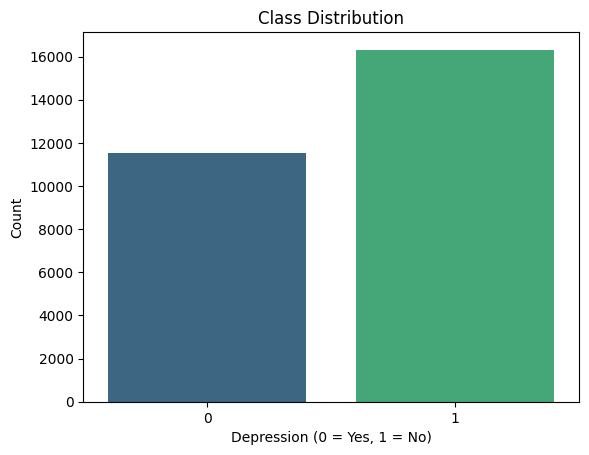

ℹ️ Target variable 'depression' distribution:
+-------+-------+------------+
| Value | Count | Percentage |
+-------+-------+------------+
|   1   | 16318 |     58.55% |
|   0   | 11550 |     41.45% |
+-------+-------+------------+


In [275]:
# ===============================================
# STEP 3: Exploratory Data Analysis (EDA)
# ===============================================

# Check the distribution of the target variable to identify any class imbalance
sns.countplot(data=df_encoded, x='depression', palette="viridis")  
plt.title("Class Distribution")
plt.xlabel("Depression (0 = Yes, 1 = No)")
plt.ylabel("Count")
plt.show()

print("ℹ️ Target variable 'depression' distribution:")
print(value_counts_pretty(df_encoded['depression']))

💡 **Observations:**  
- The dataset has a moderate class imbalance ratio is approximately 43% to 57%.
- XGBoost is relatively robust to class imbalance. We'll revisit imbalance handling if initial model performance is unsatisfactory.

### Feature Distributions analyse

### 3.2 Analysis of Numerical feature:

In [276]:
# print the Numerical feature
print("Numerical feature:")
num_cols

Numerical feature:


['age',
 'academic_pressure',
 'cgpa',
 'financial_stress',
 'study_satisfaction',
 'work_study_hours',
 'degree_encoded',
 'sleep_duration_encoded']

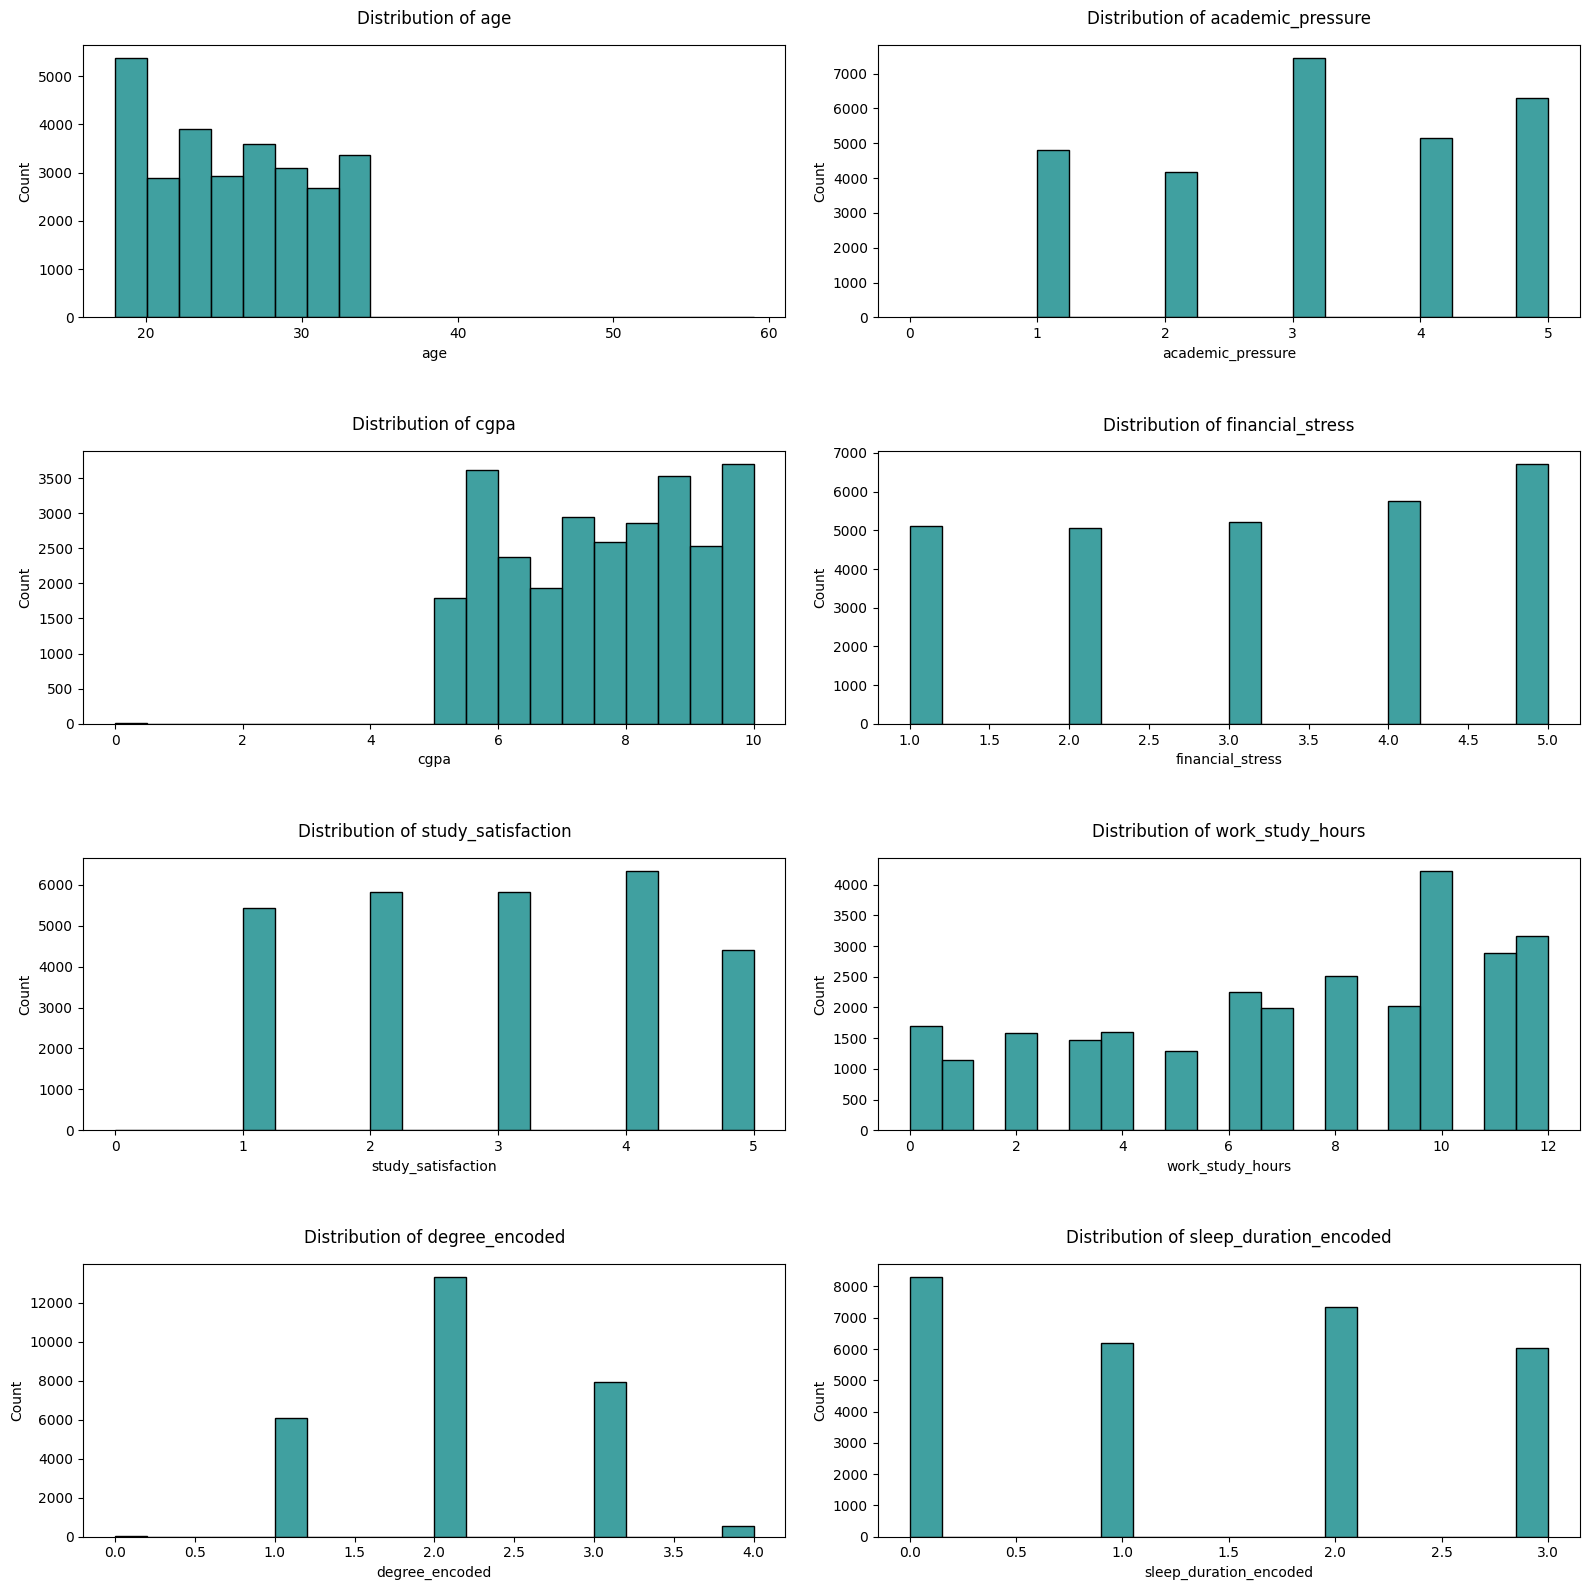

In [277]:
# Creates histograms for each of the specified numerical columns. To understand the distribution of each variable.
import math

# Define grid size
cols = 2
rows = math.ceil(len(num_cols) / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))
axes = axes.flatten()

# Plot each numerical column
for i, col in enumerate(num_cols):
    sns.histplot(data=df_encoded, x=col, kde=False, bins=20, ax=axes[i], color='teal')
    axes[i].set_title(f"Distribution of {col}", pad=15)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Hide any extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(h_pad=4, w_pad=2)
plt.show()

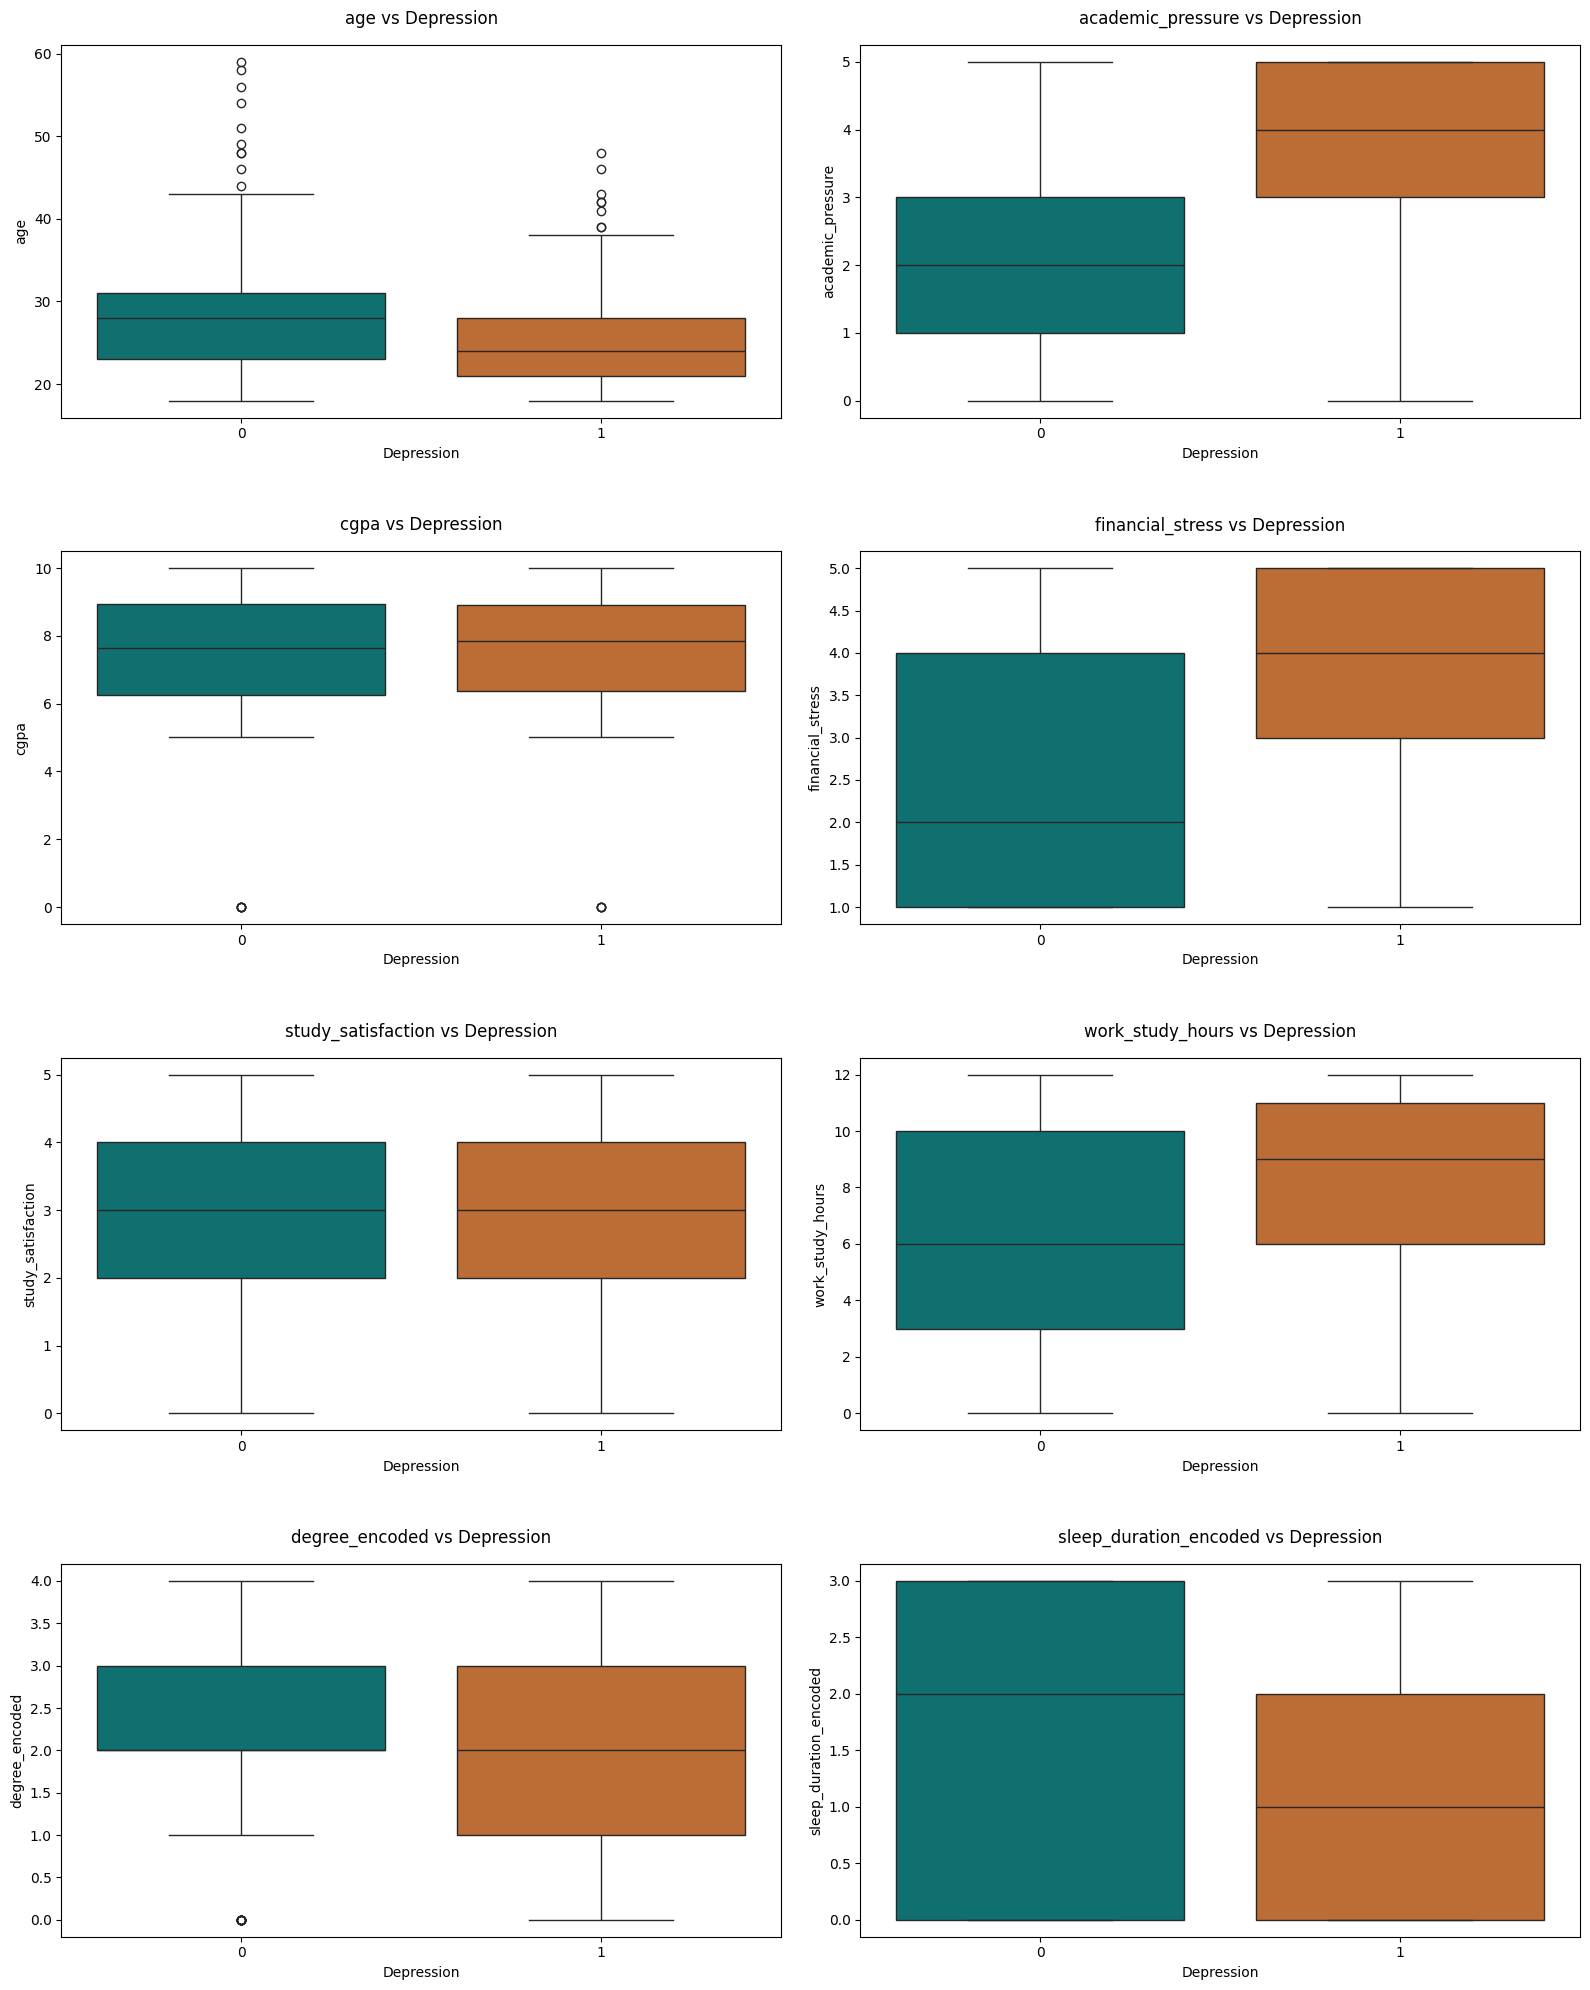

In [278]:
# features against 'Depression'
# This helps in identifying how different factors might relate to or influence depression
def boxplot(x, fig): #Function to create individual boxplots
    plt.subplot(4, 2, fig)
    sns.boxplot(x='depression', y=x, data=df_encoded, palette={'0': 'teal', '1': 'chocolate'})
    plt.title(f'{x} vs Depression', pad=15) 
    plt.xlabel('Depression')
    plt.ylabel(x)

plt.figure(figsize=(16, 20))

boxplot('age', 1)
boxplot('academic_pressure', 2)
boxplot('cgpa', 3)
boxplot('financial_stress', 4)
boxplot('study_satisfaction', 5)
boxplot('work_study_hours', 6)
boxplot('degree_encoded', 7)
boxplot('sleep_duration_encoded', 8)

plt.tight_layout(h_pad=4, w_pad=2)
plt.show()



💡 **Observations:**  

1. **Age vs Depression**  
>- Individuals with depression (`1`) tend to be slightly younger on average   
compared to those without depression (`0`).
>- There seems to be individuals who are outliers in the common age group.

2. **Academic Pressure vs Depression**  
>- Those with depression report higher academic pressure.  
>- The median value is significantly higher for the depressed group.  
>- This shows a clear separation, suggesting academic pressure could be a strong factor linked to depression.

3. **CGPA vs Depression**  
>- CGPA distributions are very similar for both groups, indicating little difference.
>- There are 0 cgpa outliers which can be missing values.

4. **Financial Stress vs Depression**  
>- Individuals with depression experience significantly higher financial stress.  
>- The depressed group's median is at the top of the scale.  
>- Clear evidence of financial burden being associated with depression.

5. **Study Satisfaction vs Depression**  
>- Slightly lower study satisfaction among those with depression.

6. **Work/Study Hours vs Depression**  
>- Depressed individuals tend to study/work longer hours on average.  
>- Suggests a possible link between longer work/study hours and higher risk of depression, possibly due to burnout or imbalance.

8. **Sleep Duration vs Depression:**
>- Strong relationship detected
>- Non-depressed: Higher sleep duration (median ~2.0-2.5)
>- Depressed: Lower sleep duration (median ~1.0-1.5)
>- This suggests that shorter sleep duration is strongly associated with depression.

💡 **Overall Assessment**  
- Variables such as `academic_pressure`, `study_satisfaction`, and `work_study_hours` contain meaningful information and can contribute effectively to the predictive modeling of depression.


In [279]:
# Filter the DataFrame to include only rows where CGPA is less than 7
print(value_counts_pretty(df_encoded[df_encoded['cgpa'] < 6]['cgpa']
, head=False, n=10))

+-------+-------+------------+
| Value | Count | Percentage |
+-------+-------+------------+
|  5.3  |    21 |      0.39% |
|  5.09 |    20 |      0.37% |
|  5.35 |    20 |      0.37% |
|  5.14 |    19 |      0.35% |
|  5.44 |    19 |      0.35% |
|  5.03 |    17 |      0.31% |
|  5.06 |    15 |      0.28% |
|  5.17 |    14 |      0.26% |
|  0.0  |     9 |      0.17% |
|  5.78 |     4 |      0.07% |
+-------+-------+------------+


💡 **Observations:**  
- There are 9 instances where cgpa is 0.
- These are likely missing or invalid values rather than true scores.

> *🧠 Let's fill these with the mean CGPA to preserve data integrity*

In [280]:
# Replace 0 with NaN to mark as missing
df_encoded['cgpa'] = df_encoded['cgpa'].replace(0, np.nan)

mean_cgpa = df_encoded['cgpa'].mean()
# Fill NaNs with the mean
df_encoded['cgpa'] = df_encoded['cgpa'].fillna(mean_cgpa)

In [281]:
print(f"Cgpa values equal to 0: {(df_encoded['cgpa'] == 0).sum()}")

Cgpa values equal to 0: 0


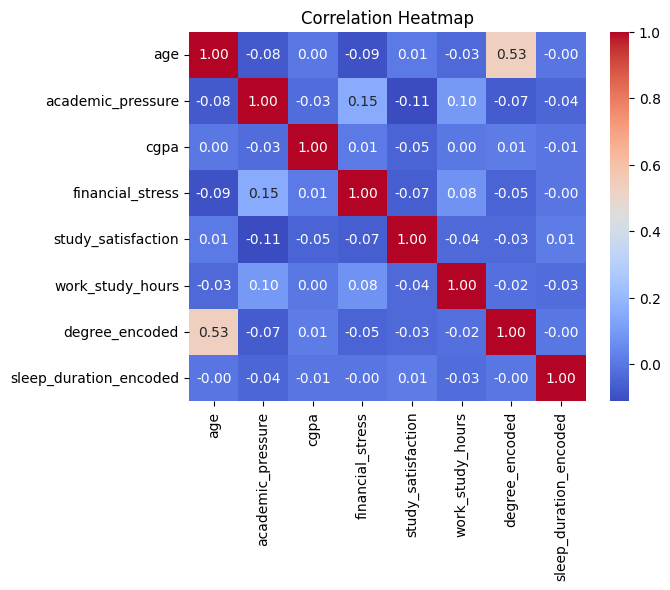

In [282]:
# correlation matrix between the specified numerical columns.
corr_matrix = df_encoded[num_cols].corr()

# Visualizes the correlation matrix as a heatmap. To understand the strength and direction of relationships between variables.
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

💡 **Overall Assessment**  
- Age and degree_encoded (0.53) - older students tend to have higher degree levels
- Most correlations are quite weak (close to 0), indicating these variables are largely independent of each other, except for the age-degree relationship which makes intuitive sense in an academic context. 
- good for avoiding multicollinearity.

### 3.3 Analysis of Categorical feature:

In [283]:
# print the Categorical feature:
print("Categorical feature:")
nominal_cat_cols

Categorical feature:


['gender',
 'dietary_habits',
 'have_you_ever_had_suicidal_thoughts',
 'family_history_of_mental_illness']

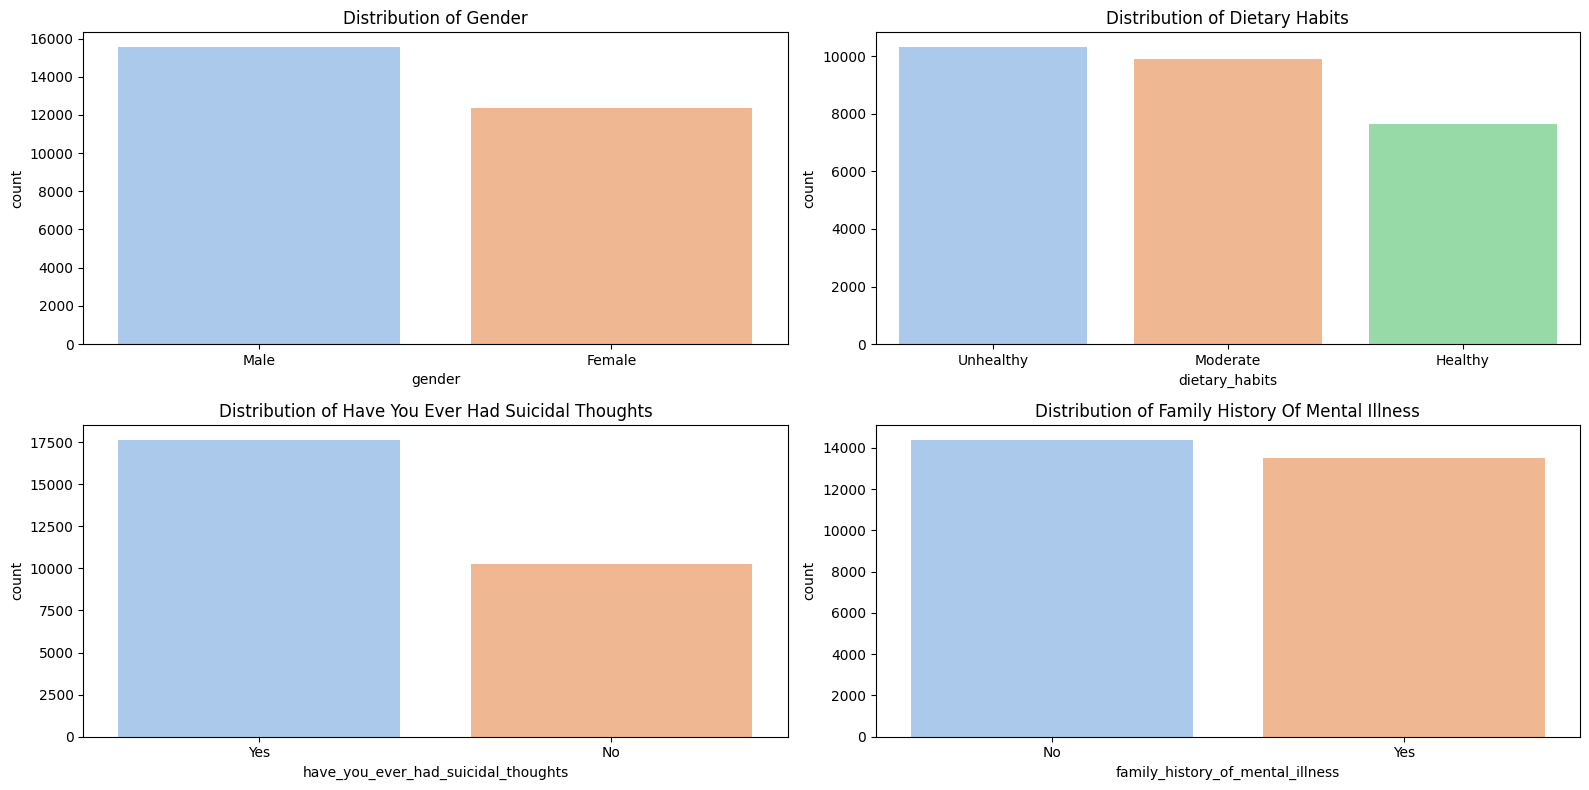

In [284]:
# Define grid size
cols = 2
rows = math.ceil(len(nominal_cat_cols) / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))
axes = axes.flatten()

# Plot each nominal feature
for i, col in enumerate(nominal_cat_cols):
    ax = axes[i]
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel', ax=ax)
    ax.set_title(f'Distribution of {col.replace("_", " ").title()}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()


> *🧠 Categorical features show sufficient variability and relevance for XGBoost with minimal preprocessing.*

## Step 6: Save clean data

### 6.1 Take quick look at cleaned data

In [285]:
# Quick look at cleaned data

print(f"🔍 Shape of the cleaned dataset:")
get_data_shape(df_encoded)
print(f"\n🔍First 5 rows of the cleaned dataset:")
print_head(df_encoded)
print(f"\n🔍 Column info and data types of the cleaned dataset:")
table = PrettyTable()
table.field_names = ["Column", "Non-Null Count", "Dtype"]

for col in df_encoded.columns:
    non_null_count = df_encoded[col].count()
    dtype = df_encoded[col].dtype
    table.add_row([col, non_null_count, dtype])
print(table)

🔍 Shape of the cleaned dataset:
DataFrame Dimensions
------------------------
Rows   : 27868
Columns: 13


🔍First 5 rows of the cleaned dataset:

First 5 rows:


,gender,age,academic_pressure,cgpa,study_satisfaction,dietary_habits,have_you_ever_had_suicidal_thoughts,work_study_hours,financial_stress,family_history_of_mental_illness,depression,degree_encoded,sleep_duration_encoded
0,Male,33.0,5.0,8.97,2.0,Healthy,Yes,3.0,1.0,No,1,2,1
1,Female,24.0,2.0,5.90,5.0,Moderate,No,3.0,2.0,Yes,0,2,1
2,Male,31.0,3.0,7.03,5.0,Healthy,No,9.0,1.0,Yes,0,2,0
3,Female,28.0,3.0,5.59,2.0,Moderate,Yes,4.0,5.0,Yes,1,2,2
4,Female,25.0,4.0,8.13,3.0,Moderate,Yes,1.0,1.0,No,0,3,1



🔍 Column info and data types of the cleaned dataset:
+-------------------------------------+----------------+----------+
|                Column               | Non-Null Count |  Dtype   |
+-------------------------------------+----------------+----------+
|                gender               |     27868      | category |
|                 age                 |     27868      | float64  |
|          academic_pressure          |     27868      | float64  |
|                 cgpa                |     27868      | float64  |
|          study_satisfaction         |     27868      | float64  |
|            dietary_habits           |     27868      | category |
| have_you_ever_had_suicidal_thoughts |     27868      | category |
|           work_study_hours          |     27868      | float64  |
|           financial_stress          |     27868      | float64  |
|   family_history_of_mental_illness  |     27868      | category |
|              depression             |     27868      |  int6

💡 **Observations:**  
- No missing values — all columns have 27,868 non-null entries.
- Dataset appears ready for modeling.


> *🧠 Remaining categorical columns (`gender`, `dietary_habits`, `suicidal_thoughts`, `family_history`) will be encoded after train-test split to prevent data leakage and ensure encoding is based only on training data.*


### 6.2 Save Cleaned Data

> To:  `clean_data.csv` saved in `Data/processed/FC110552_mithula-cbw/`

In [286]:
df_encoded.to_csv("Data/processed/FC110552_mithula-cbw/clean_data.csv", index=False)
print(f"\n🍀 Cleaned data saved as clean_data.csv")



🍀 Cleaned data saved as clean_data.csv
